<a href="https://colab.research.google.com/github/suchith1012/AOML_Project/blob/main/AOML_Project_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
O_data=pd.read_csv('/content/sample_data/resume_dataset.csv')

In [3]:
O_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...
165,Testing,â Willingness to accept the challenges. â ...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
O_data.describe()

,Category,Resume
count,169,169
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,14,2


In [5]:
from random import randint

def candidateid(name):
  temp=name.split(" ")
  temp_rand=str(randint(100, 999))
  if(len(temp)>=2):
    return temp[0][0]+temp[1][0]+temp_rand
  else:
    return temp[0][0]+temp[0][1]+temp_rand


In [6]:
O_data["candidate_id"] = O_data["Category"].apply(lambda text: candidateid(text))
O_data.head()

,Category,Resume,candidate_id
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355


In [7]:
O_data['processed_resume']=''

In [8]:
O_data.describe()

,Category,Resume,candidate_id,processed_resume
count,169,169,169,169
unique,25,166,168,1
top,Java Developer,"Technical Skills Web Technologies: Angular JS,...",Da223,
freq,14,2,2,169


In [9]:
data_distribution = O_data['Category'].value_counts()

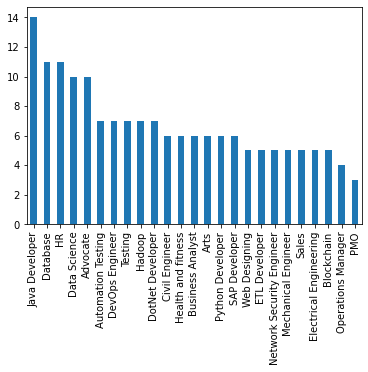

In [11]:
import matplotlib.pyplot as plt
data_distribution.plot.bar()
plt.show()

# Text Preprocessing

### Convert text to lowercase

In [12]:
O_data['processed_resume']=O_data['Resume'].str.lower()

In [13]:
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills * programming languages: python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,"areas of interest deep learning, control syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,"education details \r\n mca ymcaust, faridab..."


### Removal of Punctuations

In [14]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('[^\w\s]','')

In [15]:
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te188,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te531,â willingness to accept the challenges â posit...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te778,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te691,computer skills software knowledge mspower po...


### Remove url

In [16]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('http\S+\s*','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te188,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te531,â willingness to accept the challenges â posit...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te778,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te691,computer skills software knowledge mspower po...


### Remove RT and CC

In [17]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('RT|cc','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te188,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te531,â willingness to aept the challenges â positiv...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te778,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te691,computer skills software knowledge mspower po...


### Remove hashtags

In [18]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('#\S+','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te188,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te531,â willingness to aept the challenges â positiv...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te778,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te691,computer skills software knowledge mspower po...


### Remove mentions

In [19]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('@\S+','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te188,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te531,â willingness to aept the challenges â positiv...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te778,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te691,computer skills software knowledge mspower po...


### Removal of stopwords

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))

In [22]:
stopwords_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_list])

In [24]:
O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: remove_stopwords(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education details may 2013 may 2017 uitrgpvdat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education details mca ymcaust faridabad haryan...


### Removal of Frequent words

In [25]:
from collections import Counter
cnt = Counter()
for text in O_data["processed_resume"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('â', 2523),
 ('exprience', 634),
 ('company', 601),
 ('description', 551),
 ('details', 540),
 ('months', 539),
 ('project', 526),
 ('data', 372),
 ('1', 311),
 ('management', 310)]

In [26]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: remove_freqwords(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education may 2013 may 2017 uitrgpvdata scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education mca ymcaust faridabad haryanadata sc...


### Remove rare words

In [27]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
print(RAREWORDS)
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: remove_rarewords(text))
O_data.head()

{'2vehicle', 'suncity', 'vankan', '1time', 'wanless', '3vistor', '2web', 'park', 'tablet', 'bramha'}


,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,education may 2013 may 2017 uitrgpvdata scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,education mca ymcaust faridabad haryanadata sc...


### Stemming

In [28]:
from nltk.stem.porter import PorterStemmer

In [29]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: stem_words(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,educ may 2013 may 2017 uitrgpvdata scientistda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,educ mca ymcaust faridabad haryanadata scienc ...


### Lemmatization

In [30]:
from nltk.stem import WordNetLemmatizer


In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: lemmatize_words(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,educ may 2013 may 2017 uitrgpvdata scientistda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,educ mca ymcaust faridabad haryanadata scienc ...


###LabelEncoder -from scratch

In [33]:
O_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [34]:
O_data.loc[0]['Category']

'Data Science'

In [35]:
O_data.shape

(169, 4)

In [36]:
O_data['CategoryID'] = ''

In [37]:
category = {'Data Science':0, 'HR':1, 'Advocate':2, 'Arts':3, 'Web Designing':4,
       'Mechanical Engineer':5, 'Sales':6, 'Health and fitness':7,
       'Civil Engineer':8, 'Java Developer':9, 'Business Analyst':10,
       'SAP Developer':11, 'Automation Testing':12, 'Electrical Engineering':13,
       'Operations Manager':14, 'Python Developer':15, 'DevOps Engineer':16,
       'Network Security Engineer':17, 'PMO':18, 'Database':19, 'Hadoop':20,
       'ETL Developer':21, 'DotNet Developer':22, 'Blockchain':23, 'Testing':24}

for i in range(O_data.shape[0]):
  if O_data.loc[i]['Category'] in category.keys():
    O_data.loc[i]['CategoryID'] = category[O_data.loc[i]['Category']]

O_data.head()



,Category,Resume,candidate_id,processed_resume,CategoryID
0,Data Science,Skills * Programming Languages: Python (pandas...,DS438,skill program languag python panda numpi scipi...,0
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS666,educ may 2013 may 2017 uitrgpvdata scientistda...,0
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS143,area interest deep learn control system design...,0
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS404,skill r python sap hana tableau sap hana sql s...,0
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS355,educ mca ymcaust faridabad haryanadata scienc ...,0


# Feature Extraction

### Bag of Words Model

In [92]:
import numpy
import re

def tokenize(sentences):
    words = []
    for sentence in sentences:
        w = word_extraction(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words

def word_extraction(sentence):
    ignore = ['a', "the", "is"]
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in ignore]
    return cleaned_text    
    
def generate_bow(allsentences):    
    vocab = tokenize(allsentences)
    print("Word List for Document \n{0} \n".format(vocab));
    bag_vec_list=[]
    for sentence in allsentences:
        words = word_extraction(sentence)
        bag_vector = numpy.zeros(len(vocab))
        for w in words:
            for i,word in enumerate(vocab):
                if word == w: 
                    bag_vector[i] += 1
               
        #print("{0} \n{1}\n".format(sentence,numpy.array(bag_vector)))
        bag_vec_list.append(bag_vector)
    return numpy.array(bag_vec_list)
        



In [93]:
proc_resume_list = list(O_data['processed_resume'])


In [94]:
bag_vector_numpy=generate_bow(proc_resume_list)

Word List for Document 
['000', '01', '017', '02', '03', '0307', '04', '04th', '05', '050educ', '06th', '07', '07112016', '07educ', '08', '09876971076', '10', '100', '101', '104', '108', '109', '10g', '10grac', '10magicalfing', '10x', '11', '110', '110v', '11171iec60076', '11201', '11204', '115', '118', '1180', '11g', '11goracl', '11gr2', '12', '120', '1200', '1216', '125', '12c', '12d', '12k', '13', '130', '132kv', '14', '147', '15', '150', '1500', '15000', '16', '163', '168', '16aug2012', '16th', '17', '175', '17th', '18', '1800', '182', '18aug2012', '18c', '19', '1900', '1972', '19793', '1992', '1993', '1995', '1996', '1997', '1998', '1999', '19xx', '1autocad', '1evalu', '1exterior', '1intern', '1jan', '1page', '1project', '1st', '1web', '1x', '1year', '2', '20', '2000', '20002003', '20002005', '200020052008', '2000a', '2001', '2002', '2003', '200320082008', '2003xpvista78', '2004', '2005', '20052008', '200520082016', '2006', '20062007', '2006educ', '2007', '200708', '20071995', '20

In [95]:
bag_vector_numpy.shape

(169, 6317)

In [96]:
target=O_data['CategoryID']
target_numpy = np.array(target,dtype='int')
target_numpy.shape

(169,)

### TF-IDF Vectorizer

In [97]:
from collections import Counter
from scipy.sparse import csr_matrix
import math
import operator
from sklearn.preprocessing import normalize
import numpy as np 

In [98]:
#IDF function
def IDF(corpus, unique_words):
   idf_dict={}
   N=len(corpus)
   for i in unique_words:
     count=0
     for sen in corpus:
       if i in sen.split():
         count=count+1
       idf_dict[i]=(math.log((1+N)/(count+1)))+1
   return idf_dict

In [99]:
def fit(whole_data):
    unique_words = set()
    if isinstance(whole_data, (list,)):
      for x in whole_data:
        for y in x.split():
          unique_words.add(y)
      unique_words = sorted(list(unique_words))
      vocab = {j:i for i,j in enumerate(unique_words)}
      Idf_values_of_all_unique_words=IDF(whole_data,unique_words)
    return vocab, Idf_values_of_all_unique_words
Vocabulary, idf_of_vocabulary=fit(proc_resume_list) 

In [100]:
print(list(Vocabulary.keys()))
print(list(idf_of_vocabulary.values()))

['000', '01', '017', '02', '03', '0307', '04', '04th', '05', '050educ', '06th', '07', '07112016', '07educ', '08', '09876971076', '10', '100', '101', '104', '108', '109', '10g', '10grac', '10magicalfing', '10x', '11', '110', '110v', '11171iec60076', '11201', '11204', '115', '118', '1180', '11g', '11goracl', '11gr2', '12', '120', '1200', '1216', '125', '12c', '12d', '12k', '13', '130', '132kv', '14', '147', '15', '150', '1500', '15000', '16', '163', '168', '16aug2012', '16th', '17', '175', '17th', '18', '1800', '182', '18aug2012', '18c', '19', '1900', '1972', '19793', '1992', '1993', '1995', '1996', '1997', '1998', '1999', '19xx', '1autocad', '1evalu', '1exterior', '1intern', '1jan', '1page', '1project', '1st', '1web', '1x', '1year', '2', '20', '2000', '20002003', '20002005', '200020052008', '2000a', '2001', '2002', '2003', '200320082008', '2003xpvista78', '2004', '2005', '20052008', '200520082016', '2006', '20062007', '2006educ', '2007', '200708', '20071995', '20072015', '2008', '200820

In [101]:
def transform(dataset,vocabulary,idf_values):
     sparse_matrix= csr_matrix( (len(dataset), len(vocabulary)), dtype=np.float64)
     for row  in range(0,len(dataset)):
       number_of_words_in_sentence=Counter(dataset[row].split())
       for word in dataset[row].split():
           if word in  list(vocabulary.keys()):
               tf_idf_value=(number_of_words_in_sentence[word]/len(dataset[row].split()))*(idf_values[word])
               sparse_matrix[row,vocabulary[word]]=tf_idf_value
     print("NORM FORM\n",normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False))
     output =normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False)
     return output
final_output=transform(proc_resume_list,Vocabulary,idf_of_vocabulary)
print(final_output.shape) 

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


NORM FORM
   (0, 167)	0.07426564672790036
  (0, 240)	0.02279446117160016
  (0, 284)	0.015003423886500441
  (0, 382)	0.07426564672790036
  (0, 384)	0.02786911232805678
  (0, 403)	0.03202235104596588
  (0, 428)	0.026851480503835873
  (0, 440)	0.04095455585516971
  (0, 528)	0.02223351854893603
  (0, 564)	0.15598280113213672
  (0, 569)	0.18235568937280128
  (0, 572)	0.020311573016334215
  (0, 581)	0.02903258560880623
  (0, 591)	0.044251166885252775
  (0, 596)	0.032979979327011265
  (0, 611)	0.024047774517807444
  (0, 694)	0.03861557310613201
  (0, 710)	0.1202388725890372
  (0, 711)	0.02843005495072091
  (0, 712)	0.044251166885252775
  (0, 717)	0.09117242806526261
  (0, 759)	0.041502326975448756
  (0, 838)	0.01659792476981528
  (0, 848)	0.08190911171033942
  (0, 881)	0.02638675726684513
  :	:
  (168, 4684)	0.024938070109128525
  (168, 4704)	0.0245831822682661
  (168, 4775)	0.1144628568646319
  (168, 4867)	0.0762913896093047
  (168, 4903)	0.053731381803720175
  (168, 4991)	0.0339531245037294

In [102]:
final_output.shape

(169, 6318)

In [103]:
type(final_output[0][0])

scipy.sparse.csr.csr_matrix

In [104]:
tf_idf_vector = csr_matrix.toarray(final_output)

In [105]:
type(tf_idf_vector),tf_idf_vector.shape

(numpy.ndarray, (169, 6318))

# Classifiers

### With BOW model

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_vector_numpy, target_numpy, test_size=0.33, random_state=42)

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((113, 6317), (56, 6317), (113,), (56,))

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf_1 = MultinomialNB(alpha=.01)
clf_1.fit(X_train,y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [81]:
# Predict and score the vectors
pred = clf_1.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
f1_score = metrics.f1_score(y_test, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.6785714285714286
Total F1 classification score: 0.6215353535353535


In [82]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [83]:
y_pred = sgd.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
f1_score_value = metrics.f1_score(y_test, y_pred, average='macro')

print('Total accuracy classification score: {}'.format(accuracy_score))
print('Total F1 classification score: {}'.format(f1_score_value))

Total accuracy classification score: 0.5535714285714286
Total F1 classification score: 0.4408074768368886


In [122]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42,max_iter=2000)
svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [123]:
y_pred_svc = svc.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred_svc)
f1 = metrics.f1_score(y_test, y_pred_svc, average='macro')

print('Total accuracy classification score: {}'.format(acc))
print('Total F1 classification score: {}'.format(f1))

Total accuracy classification score: 0.6785714285714286
Total F1 classification score: 0.6328169515669515


### With TF-IDF Vectorizer

In [106]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(tf_idf_vector, target_numpy, test_size=0.33,random_state=42)

In [107]:
clf_2 = MultinomialNB(alpha=.01)
clf_2.fit(X_train_1,y_train_1)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [108]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((113, 6318), (56, 6318), (113,), (56,))

In [109]:
# Predict and score the vectors
pred_1 = clf_2.predict(X_test_1)
acc_score = metrics.accuracy_score(y_test_1, pred_1)
f1_score = metrics.f1_score(y_test_1, pred_1, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7142857142857143
Total F1 classification score: 0.6835555555555556


In [110]:
sgd_2=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_2.fit(X_train_1, y_train_1)
y_pred_1 = sgd_2.predict(X_test_1)

accuracy_score = metrics.accuracy_score(y_test_1, y_pred_1)
f1_score_value = metrics.f1_score(y_test_1, y_pred_1, average='macro')

print('Total accuracy classification score: {}'.format(accuracy_score))
print('Total F1 classification score: {}'.format(f1_score_value))

Total accuracy classification score: 0.7857142857142857
Total F1 classification score: 0.7731672262922263


In [126]:
svc_2 = LinearSVC(random_state=42,max_iter=2000)
svc_2.fit(X_train_1,y_train_1)
y_pred_svc_2 = svc_2.predict(X_test_1)

acc = metrics.accuracy_score(y_test_1, y_pred_svc_2)
f1 = metrics.f1_score(y_test_1, y_pred_svc_2, average='macro')

print('Total accuracy classification score: {}'.format(acc))
print('Total F1 classification score: {}'.format(f1))

Total accuracy classification score: 0.8214285714285714
Total F1 classification score: 0.7738571613571613


# Resume Recommendation system

##Considering Job description

In [111]:
job_desc = "Advanced analytical knowledge of data, conducting big data analysis, Data conditioning, Programming advanced computing, developing algorithms, developing software and data models, executing predictive analytics. Master’s degree in Operations Research, Industrial Engineering, Applied Mathematics, Statistics, Physics, Computer Science, or related fields. 5-7 years of professional experience. Proficient with one or more programming languages (Java, C++, Python, R, etc.). Demonstrated experience applying data science methods to real-world data problems. Experience utilizing visualization tools to take advantage of the growing volume of available information"
#text to lowercase
job_desc = job_desc.lower()
# removing stopwords
cleaned_job_desc = remove_stopwords(job_desc)
# stemming
cleaned_job_desc = stem_words(cleaned_job_desc)
#lemmetizing
cleaned_job_desc = lemmatize_words(cleaned_job_desc)


In [112]:
def transform_jobdesc(data,vocabulary,idf_values):
     sparse_matrix= csr_matrix( (1, len(vocabulary)), dtype=np.float64)
     number_of_words_in_sentence=Counter(data.split())
     for word in data.split():
        if word in  list(vocabulary.keys()):
            tf_idf_value=(number_of_words_in_sentence[word]/len(data.split()))*(idf_values[word])
            sparse_matrix[0,vocabulary[word]]=tf_idf_value
     print("NORM FORM\n",normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False))
     output =normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False)
     return output

In [113]:
cleaned_job_desc_vector=transform_jobdesc(cleaned_job_desc,Vocabulary,idf_of_vocabulary)

NORM FORM
   (0, 428)	0.3163716586759364
  (0, 429)	0.24126901986624846
  (0, 569)	0.1342853606983266
  (0, 632)	0.3163716586759364
  (0, 770)	0.14370730749407687
  (0, 904)	0.1886481513313218
  (0, 1365)	0.09321557075433648
  (0, 1379)	0.13602728279639514
  (0, 1677)	0.2006855039332413
  (0, 1694)	0.26068981678371783
  (0, 1730)	0.14286961978087037
  (0, 2152)	0.1209356635744898
  (0, 2169)	0.21496223893061495
  (0, 2544)	0.22748974516626047
  (0, 2837)	0.1397135303194817
  (0, 2850)	0.11155997229047508
  (0, 3140)	0.11155997229047508
  (0, 3190)	0.10947714071994744
  (0, 3569)	0.18360163774287108
  (0, 3933)	0.15040156612541372
  (0, 3958)	0.08838726974686226
  (0, 4307)	0.1942896735488031
  (0, 4375)	0.15544807971386446
  (0, 4376)	0.15544807971386446
  (0, 4380)	0.209269763015785
  (0, 4648)	0.11050723587661954
  (0, 4934)	0.1126363676718058
  (0, 5202)	0.09321557075433648
  (0, 5499)	0.12941021608938794
  (0, 5707)	0.09321557075433648
  (0, 5950)	0.1528583907290806
  (0, 6065)	0.1

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [114]:
cleaned_job_desc_vector=csr_matrix.toarray(cleaned_job_desc_vector)

In [115]:
cleaned_job_desc_vector.shape

(1, 6318)

In [117]:
cleaned_job_desc_vector[0][5499]

0.12941021608938794

In [118]:
tf_idf_vector.shape

(169, 6318)

##Cosine Similarity

In [119]:
def cosine_similarity_Jobdesc_resume(job_desc_vector,tf_idf_vector):
  cosine_similarity_dict={}
  count=0
  for row in tf_idf_vector:
    sim_score = np.dot(job_desc_vector,row)
    #print(sim_score)
    cosine_similarity_dict[count]=sim_score
    count+=1
  cosine_sim_score_sorted= dict(sorted(cosine_similarity_dict.items(),
                            key=operator.itemgetter(1),
                            reverse=True))
  cosine_sim_score_items = cosine_sim_score_sorted.items()
  return list(cosine_sim_score_items)[:5]
  



In [120]:
cosine_similarity_Jobdesc_resume(cleaned_job_desc_vector,tf_idf_vector)

[(3, array([0.15156932])),
 (0, array([0.13365248])),
 (20, array([0.12090708])),
 (103, array([0.11163754])),
 (6, array([0.10984415]))]

Need to candidate IDs, so that distinction will be clear

## KNN 

In [ ]:
import math
def euclidean_distance(d1,d2):
  temp=np.sum(np.square(d1 - d2))
  temp_2=np.sqrt(temp)
  return temp_2


In [ ]:
def knn(tf_idf_vector,cleaned_job_desc_vector,k):
  neighbor_distances=[]
  for i in range(tf_idf_vector.shape[0]):
    neighbor_distances.append(euclidean_distance(tf_idf_vector[i],cleaned_job_desc_vector))
  sorted_neighbor_distances = sorted(neighbor_distances)
  k_nearest_distances = sorted_neighbor_distances[:k]
  s = numpy.array(neighbor_distances)
  sort_index = numpy.argsort(s)
  return k_nearest_distances,sort_index[:k]

In [ ]:
knn_list,sort_list=knn(tf_idf_vector,cleaned_job_desc_vector,5)

In [ ]:
knn_list

[1.3012904233066522,
 1.3162315115296719,
 1.320045668664021,
 1.3328781753663095,
 1.3332897709966447]

In [ ]:
sort_list

array([  3,   0,  20, 103,   6])

In [ ]:
for i in sort_list:
  print(O_data._get_value(i, 'candidate_id'))

DS533
DS265
HR592
OM210
DS209
